-> Arvore de decisão: É um algoritmo de aprendizado supervisionado que constrói
um modelo na forma de uma estrutra de arvire, onde cada nó de decisão representa um teste em uma caracteristica (como "temperatura"), cada ramificação representa o resultado desse teste, e cada nó folha representa 
a classe ou valor final previsto.


-> Nó Raiz (Root Node): O primeiro nó, no topo da árvore. Representa todo o
conjunto de dados.

-> Nós de decisão (Decision Nodes): Nós intermediários onde o conjunto de dados
é dividido com base em uma condição.

-> Ramos (Branches): Conectam os nós e representam os resultados das 
decisões.

-> Nós Folha(Leaf Nodes): Os nós finais da arvore, que contém a previsão ou
a conclusão. Não há mais divsões a partir deles.

-> Como ela aprende: O algoritmo constrói a árvore de forma recursiva, procurando a melhor "pergunta" (a melhor caracteristica para dividir os dados)
em cada etapa. O objetivo é criar nós folha que sejam o mais "puros" possivel,
ou seja, que contenham dados que pertencem a uma única classe (na classificação) ou que tenham valores muito próximos uns dos outros (na regressão). Para isso, ele usa métricas como entropia e Gini impurity (para
classificação) ou erro médio (para regressão). 

-> Vantagens: Fáceis de entender e visualizar, não exigem muita preparação de dados, podem lidar com dados numéricos e categóricos.

-> Desvantagens: Podem facilmente overfittar (se ajustam demais aos dados de
treino, capturando "ruido" em vez de padrão geral), pequenas mudanças mudanças nos dados podem levar a uma arvore completamente diferente.

Criação da arvore de decisão

In [37]:
# Função que irá construir a árvore de decisão usando os dados de um
# conjunto de dados. A função irá receber como argumento:
# x: Variáveis de caracteristicas (variáveis independentes)
# y: Variável alvo (variável dependente que será prevista pela árvore após 
# entrada de um novo dado)
def computarArvoreDecisao(x, y):
    
    # Import da classe DecisionTreeRegressor da biblioteca sklearn.tree
    # que tem como objetivo criar regressões de arvores de decisão. A previsão
    # para o novo dado ocorre com o valor médio de todos os exemplos que cairam na folha que ele esta ALOCADO. Por exemplo, vamos supor que em média, trabalhadores com mais de 4 anos de experiência recebam 150.00 reias de salário, dessa forma, ao inserirmos na arvore um novo
    # trabalhador de 4 anos de experiência, iremos atribuir a ele (na arvore)
    # 150.000 reias de salário médio.
    from sklearn.tree import DecisionTreeRegressor
    
    # Instância da classe (criação do objeto)
    regressor = DecisionTreeRegressor()
    
    # Ira treinar o modelo da arvore usando os dados de x e y.
    regressor.fit(x, y)
    
    # Ira retornar o modelo treinado
    return regressor

Construindo o gráfico que irá mostrar a reta de previsão da arvore

In [38]:
# import da biblioteca que permite construir e manipular 
# gráficos
import matplotlib.pyplot as plt

# Função que irá construir o gráfico de linhas que irão 
# mostrar a forma como a arvore irá alocar os seus novos
# dados. A função recebe como argumento:
# xpoints: Pontos que irão representar os valores reais
# da coluna de expriência em anos.
# ypoints: Ira representar os valores reais dos salarios.
# xline: Ira representar os valores de x que serão percorridos
# pela linha.
# yline: Ira representar os valores de y que serão percorridos
# pela linha.
def showPlot(xpoints, ypoints, xline, yline):
    
    # Ira construir os pontos do do gráfico. A função ira receber
    # como argumento:
    # xpoints: valores reais de x (experiência em anos)
    # ypoints: valores reais de y (salário)
    # color: Ira definir a cor dos pontos
    plt.scatter(xpoints, ypoints, color='red')
    
    # Irá construir a linha do gráfico. A função irá receber como
    # argumento:
    # xline: Valores de x que a linha irá percorrer
    # yline: Valores de y que a linha irá percorrer
    # color: irá definir a cor da linha
    plt.plot(xline, yline, color='blue')
    
    # Titulo do gráfico
    plt.title('Comparando pontos reais com a reta produzida pela regressão de árvore de decisão.')
    
    # Rótulo do eixo x
    plt.xlabel('Experiência em anos')
    
    # Rótulo do eixo x
    plt.ylabel('Salário')
    
    # Irá mostrar o gráfico na tela
    plt.show()

Função que irá aplicar a árvore de decisão

In [ ]:
# Biblioteca que possui funções para manipular o tempo
import time

# Import do nosso arquivo de funções
from minhasfuncoes import funcoes

# Import da biblioteca numpy que permite realizar cálculos
# matemáticos e manipular arrays
import numpy as np

# Função que irá aplicar a arvore de decisão nos dados. A função
# recebe como argumento:
# nome_do_aruqivo: Nome da base de dados (local que o arquivo está armazenado)
# delimitador: Sinal que divide os dados do arquivo. O argumento irá receber como
# valor padrão a virgula (sinal padrão da divisão dos dados nos arquivos)
def arvore_de_decisao(nome_do_arquivo, delimitador = ','):
    
    # Ira pegar o segundo atual (inicio da execução do programa)
    tempo_inicial = time.time()
    
    # Trecho que ira carregar o dataset na memória ram do sistema.
    # Como no nosso arquivo de funções nós dividimos os dados em
    # x e y (ao fazer isso, transformamos as variáveis em arrays numpy), 
    # temos que atribuir os valores da função em 2 variáveis (x e y).
    # x: Ira receber os valores de x (caracteristicas)
    # y: Irá receber os valores de y (variável alvo).
    # carregar_dataset: Função que irá carregar o dataset na memória.
    # A função irá receber como argumento o nome do arquivo e seu
    # delimitador
    x, y = funcoes.carregar_Dataset(nome_do_arquivo, delimitador)
    
    # Ira calcular o tempo necessário para o carregamento do dataset
    tempo_necessario = time.time() - tempo_inicial
    
    # Impressão do tempo necessário para o carregamento do dataset.
    print("Tempo necessário para o carregamento do arquivo: ", round(tempo_necessario, 3), " segundos")
    
    # Ira pegar o segundo atual (inicio da execução da árvore)
    tempo_inicial = time.time()
    
    # Chamada da função que irá construir a árvore de decisão.
    # A função recebe como argumento:
    # x: caracteristica 
    # y: variável alvo
    arvore = computarArvoreDecisao(x,y)
    
    # Cálculo do tempo necessário para a execução da árvore.    
    tempo_necessario = time.time() - tempo_inicial
    
    # Impressão do tempo necessário para a construção da árvore.
    print("Tempo necessário para o treinamento dos dados utilizados na árvore de decisão: ", round(tempo_necessario, 3))
    
    # Irá pegar o segundo atual (inicio da construção
    # do gráfico).
    tempo_inicial = time.time()
    
    # O xgrid ajuda a entender os dados e o modelo de regressão
    # da árvore por que ele revela visualmente o comportamento
    # da arvore em todo o dominio de dados. Pense na árvore como
    # um conjunto de regras (como por exemplo, "se a experiência
    # for entre 0 e 2 anos o salário é X; se for entre 2 e 5 anos,
    # o salário é y"). Quando plotamos apenas os pontos dos dados
    # originais, você tem apenas alguns pontos isolados. Você não
    # consegue ver as regras que a árvore criou.
    # np.arange: Função da biblioteca numpy que cria um array de
    # números em um intervalo especifico.A função recebe como argumento
    # min(x): Contém o menor valor de x
    # max(x): Contém o maior valor de x
    # 0.01: Define o tamanho do espaçamento entre os dados
    XGrid = np.arange(min(x), max(x), 0.01)
    
    # reshape: Método que muda a forma do seu array
    XGrid = XGrid.reshape((len(XGrid), 1))
    
    # x: Valores x reais da base de dados
    # y: Valores reais da base de dados.
    # xgrid: Valores de x com as regras aplicadas pelas arvores
    # arvore.predict: valores previstos pela arvore
    showPlot(x,y, XGrid, arvore.predict(XGrid))
    
    tempo_necessario = time.time() - tempo_inicial
    
    print("Tempo necessário para construção do gráfico de predição da árvore: ", round(tempo_necessario, 3))
    
    from sklearn.tree import export_graphviz
    
    import graphviz
    
    dados = export_graphviz(arvore, out_file=None, feature_names=['Experiência'])
    
    source = graphviz.Source(dados)
    
    source.render(filename='arvore_de_decisao', format='png', view=True)    
    

Tempo necessário para o carregamento do arquivo:  0.052  segundos
Tempo necessário para o treinamento dos dados utilizados na árvore de decisão:  0.019


C:\Users\caike\AppData\Local\Temp\ipykernel_8424\3379499978.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  XGrid = np.arange(min(x), max(x), 0.01)


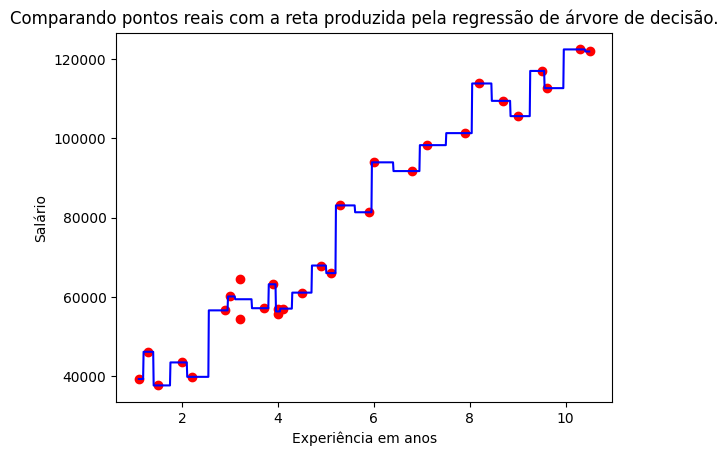

Tempo necessário para construção do gráfico de predição da árvore:  0.17


In [40]:
arvore_de_decisao('dados/salary.csv', ';')

Aplicando a árvore de decisão em outro conjunto de salários 

Tempo necessário para o carregamento do arquivo:  0.003  segundos
Tempo necessário para o treinamento dos dados utilizados na árvore de decisão:  0.001


C:\Users\caike\AppData\Local\Temp\ipykernel_8424\3379499978.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  XGrid = np.arange(min(x), max(x), 0.01)


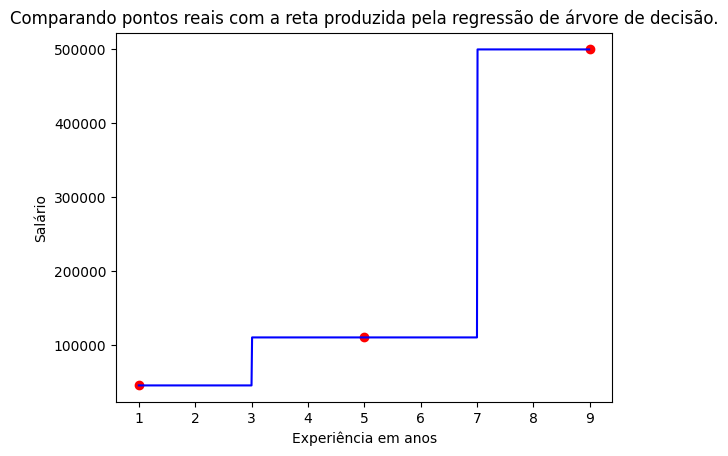

Tempo necessário para construção do gráfico de predição da árvore:  0.141


In [41]:
arvore_de_decisao('Dados/salary2.csv', ';')